In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00
time: 328 µs (started: 2024-01-15 18:09:50 +00:00)


In [123]:
import glob, os
import random
import shutil
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
path="drive/MyDrive/imagensOriginais/"
imagens_originais= glob.glob(os.path.join(path, '*.jpg'))

time: 26.3 ms (started: 2024-01-15 22:05:20 +00:00)


In [124]:
def dataset(file_list,size=(224,224)):
	imagens = []
	for i, file in enumerate(imagens_originais):
		imagem = io.imread(file)
		imagem = transform.resize(imagem, size, mode='constant')
		imagens.append(imagem)

	labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

	return np.array(imagens), np.array(labels)

time: 996 µs (started: 2024-01-15 22:05:23 +00:00)


In [125]:
imagens,labels=dataset(imagens_originais)

time: 30.7 s (started: 2024-01-15 22:05:23 +00:00)


In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(imagens, labels, test_size = 0.20, random_state = 40)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 40)

time: 5.1 s (started: 2024-01-15 22:05:54 +00:00)


In [127]:
EPOCHS = 60
BATCH_SIZE = 16

time: 537 µs (started: 2024-01-15 22:05:59 +00:00)


In [128]:
train_generator = ImageDataGenerator(
                                      shear_range=30,
                                      rotation_range=20,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                  ).flow(X_train, Y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator(
                                      shear_range=30,
                                      rotation_range=20,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                  ).flow(X_validation, Y_validation, batch_size=BATCH_SIZE)

time: 139 ms (started: 2024-01-15 22:05:59 +00:00)


In [131]:
def create_model():
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  # Congela todas as camadas
  for layer in base_model.layers:
    layer.trainable = False


  x = base_model.output
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  predictions = layers.Dense(1, activation='sigmoid')(x)

  model = models.Model(inputs=base_model.input, outputs=predictions)

  model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

  return model

time: 779 µs (started: 2024-01-15 22:06:57 +00:00)


In [132]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "VGG16Pre/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

time: 575 µs (started: 2024-01-15 22:06:59 +00:00)


In [133]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch")

time: 917 µs (started: 2024-01-15 22:07:04 +00:00)


In [134]:
model = create_model()
# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

58889256/58889256 [==============================] - 0s 0us/step
time: 1.14 s (started: 2024-01-15 22:07:08 +00:00)


In [135]:
steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

time: 571 µs (started: 2024-01-15 22:07:13 +00:00)


In [136]:
history = model.fit(train_generator,
                   steps_per_epoch=steps_per_epoch,
                   epochs=EPOCHS,
                   callbacks=[cp_callback],
                   validation_data=validation_generator,
                   validation_steps=validation_steps,
                   shuffle=True,
                   verbose=2)

Epoch 1/60

Epoch 1: saving model to VGG16Pre/cp-0001.ckpt
30/30 - 15s - loss: 0.7747 - acc: 0.5480 - val_loss: 0.7774 - val_acc: 0.5500 - 15s/epoch - 515ms/step
Epoch 2/60

Epoch 2: saving model to VGG16Pre/cp-0002.ckpt
30/30 - 7s - loss: 0.6185 - acc: 0.6844 - val_loss: 0.5245 - val_acc: 0.7625 - 7s/epoch - 224ms/step
Epoch 3/60

Epoch 3: saving model to VGG16Pre/cp-0003.ckpt
30/30 - 9s - loss: 0.5113 - acc: 0.7548 - val_loss: 0.5241 - val_acc: 0.6875 - 9s/epoch - 305ms/step
Epoch 4/60

Epoch 4: saving model to VGG16Pre/cp-0004.ckpt
30/30 - 7s - loss: 0.4789 - acc: 0.7676 - val_loss: 0.4397 - val_acc: 0.8250 - 7s/epoch - 232ms/step
Epoch 5/60

Epoch 5: saving model to VGG16Pre/cp-0005.ckpt
30/30 - 8s - loss: 0.4327 - acc: 0.7996 - val_loss: 0.5515 - val_acc: 0.6750 - 8s/epoch - 259ms/step
Epoch 6/60

Epoch 6: saving model to VGG16Pre/cp-0006.ckpt
30/30 - 9s - loss: 0.4305 - acc: 0.8081 - val_loss: 0.4387 - val_acc: 0.7625 - 9s/epoch - 309ms/step
Epoch 7/60

Epoch 7: saving model to V

In [144]:
# Especificar o diretório de destino no Google Drive
drive_dir = '/content/drive/MyDrive/VGG16Pre/'

time: 473 µs (started: 2024-01-15 22:27:59 +00:00)


In [139]:
shutil.copytree(checkpoint_dir, drive_dir)

'/content/drive/MyDrive/VGG16Pre/'

time: 3min 9s (started: 2024-01-15 22:17:45 +00:00)


In [143]:
def smooth_curve(points, factor=0.8): #this function will make our plots more smooth
	smoothed_points = []
	for point in points:
		if smoothed_points:
			previous = smoothed_points[-1]
			smoothed_points.append(previous*factor+point*(1-factor))
		else:
			smoothed_points.append(point)
	return smoothed_points

time: 832 µs (started: 2024-01-15 22:27:52 +00:00)


In [145]:
def imprime_graficos(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc)+1)
  plt.plot(epochs, smooth_curve(acc), 'bo', label='Treinamento acc')
  plt.plot(epochs, smooth_curve(val_acc), 'r-', label='Validação acc')
  plt.legend()
  plt.title('Treinamento and Validação Acc')
  plt.figure()

  plt.plot(epochs, smooth_curve(loss), 'bo', label='Treinamento loss')
  plt.plot(epochs, smooth_curve(val_loss), 'r-', label='Validação loss')
  plt.legend()
  plt.title('Treinamento e Validação Loss')
  plt.show()

  print("\n")

time: 1.09 ms (started: 2024-01-15 22:28:03 +00:00)


In [146]:
def metricas(modelo_metricas, epocas):

  # Obter as previsões do modelo nos dados de teste
  y_pred = modelo_metricas.predict(X_test)

  # Converter as previsões em rótulos binários
  y_pred_binary = (y_pred > 0.5).astype(int)

  # Calcular as métricas de precisão, recall e F1 Score
  classification_rep = classification_report(Y_test, y_pred_binary)
  print("Classification Report:\n", classification_rep)


  #Calcula a matriz de confusão
  cm = confusion_matrix(Y_test, y_pred_binary)
  # Display
  plt.figure(figsize=(4, 4))

  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=["No Pollen", "Pollen"])
  plt.yticks(ticks=[0.5, 1.5], labels=["No Pollen", "Pollen"])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix " + str(epocas) + " épocas")

  plt.show()

  print("\n")

time: 761 µs (started: 2024-01-15 22:28:06 +00:00)


In [130]:
#shutil.rmtree(checkpoint_dir, ignore_errors=False, onerror=None)

time: 555 ms (started: 2024-01-15 22:06:18 +00:00)


Avaliando modelo com checkpoint VGG16Pre/cp-0010.ckpt correspondente a época 10
5/5 [==============================] - 11s 1s/step - loss: 0.3355 - acc: 0.8811
Restored model, accuracy: 0.881118893623352
Restored model, loss: 0.3355499505996704

5/5 [==============================] - 1s 120ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87        67
           1       0.89      0.88      0.89        76

    accuracy                           0.88       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.88      0.88      0.88       143



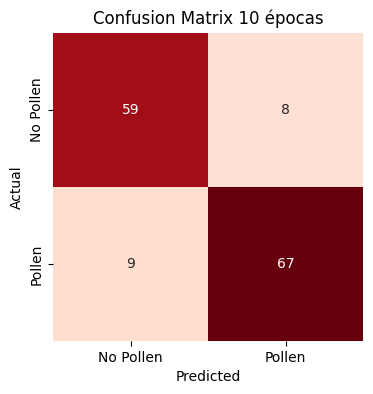



Avaliando modelo com checkpoint VGG16Pre/cp-0020.ckpt correspondente a época 20
5/5 [==============================] - 1s 112ms/step - loss: 0.2547 - acc: 0.8881
Restored model, accuracy: 0.8881118893623352
Restored model, loss: 0.25469672679901123

5/5 [==============================] - 1s 116ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        67
           1       0.88      0.92      0.90        76

    accuracy                           0.89       143
   macro avg       0.89      0.89      0.89       143
weighted avg       0.89      0.89      0.89       143



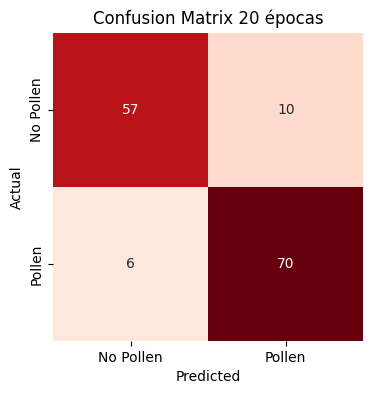



Avaliando modelo com checkpoint VGG16Pre/cp-0030.ckpt correspondente a época 30


5/5 [==============================] - 2s 113ms/step - loss: 0.2725 - acc: 0.8531
Restored model, accuracy: 0.8531468510627747
Restored model, loss: 0.27250799536705017

5/5 [==============================] - 1s 126ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.72      0.82        67
           1       0.80      0.97      0.88        76

    accuracy                           0.85       143
   macro avg       0.88      0.85      0.85       143
weighted avg       0.87      0.85      0.85       143



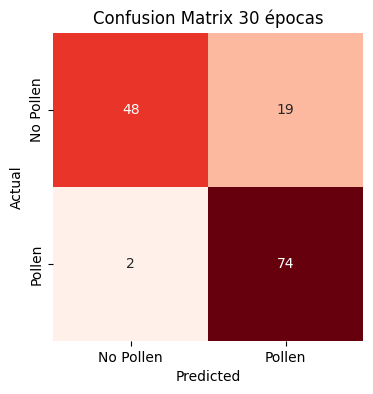



Avaliando modelo com checkpoint VGG16Pre/cp-0040.ckpt correspondente a época 40
5/5 [==============================] - 1s 115ms/step - loss: 0.2181 - acc: 0.9021
Restored model, accuracy: 0.9020978808403015
Restored model, loss: 0.21805442869663239

5/5 [==============================] - 1s 133ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        67
           1       0.89      0.93      0.91        76

    accuracy                           0.90       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



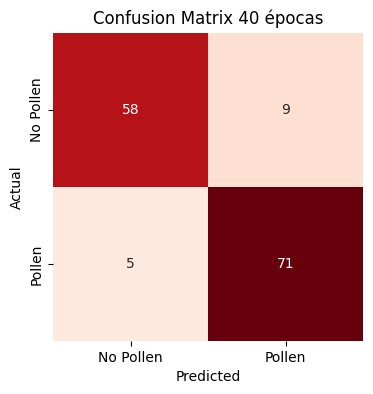



Avaliando modelo com checkpoint VGG16Pre/cp-0050.ckpt correspondente a época 50
5/5 [==============================] - 1s 116ms/step - loss: 0.1948 - acc: 0.9441
Restored model, accuracy: 0.9440559148788452
Restored model, loss: 0.1948302686214447

5/5 [==============================] - 1s 134ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.96      0.93      0.95        76

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



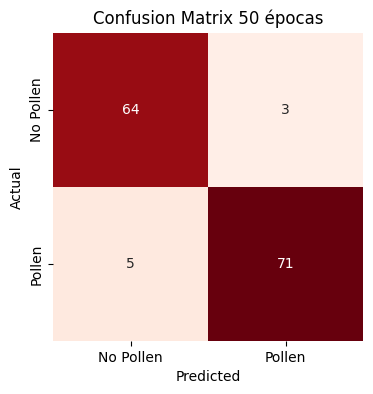



Avaliando modelo com checkpoint VGG16Pre/cp-0060.ckpt correspondente a época 60
5/5 [==============================] - 1s 114ms/step - loss: 0.1764 - acc: 0.9301
Restored model, accuracy: 0.9300699234008789
Restored model, loss: 0.17637602984905243

5/5 [==============================] - 1s 117ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        67
           1       0.90      0.97      0.94        76

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



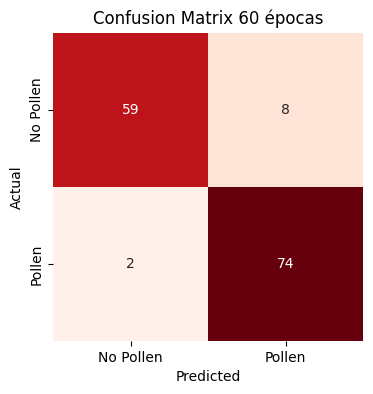



time: 42.7 s (started: 2024-01-15 22:29:09 +00:00)


In [148]:
epoca = 10
for i in range(6):
  cp = "VGG16Pre/cp-00"+str(epoca)+".ckpt"
  print("Avaliando modelo com checkpoint " + cp + " correspondente a época " + str(epoca))
  avaliacao_modelo = create_model()
  # Load the previously saved weights
  avaliacao_modelo.load_weights(cp)

  # Re-evaluate the model
  loss, acc = avaliacao_modelo.evaluate(X_test, Y_test)
  print("Restored model, accuracy: " + str(acc) )
  print("Restored model, loss: " + str(loss) + "\n")

  metricas(avaliacao_modelo, epoca)

  epoca += 10

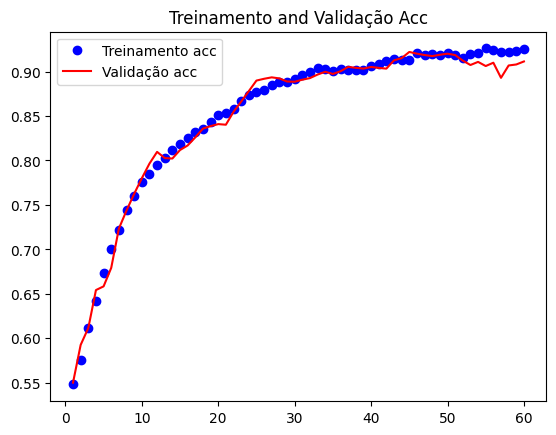

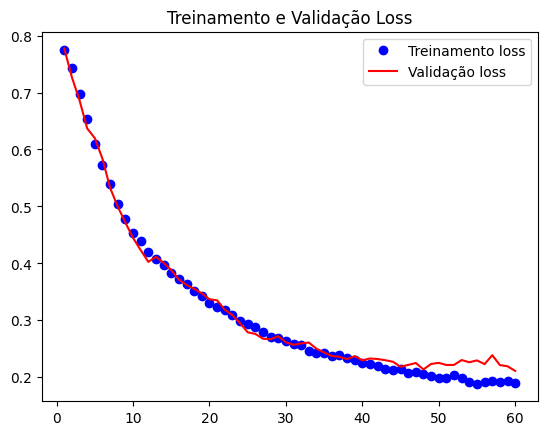



time: 467 ms (started: 2024-01-15 22:30:13 +00:00)


In [149]:
imprime_graficos(history)